Alejandro Figueroa Ramírez
Project 3 CIIC 5015 
841-17-2484

In [2]:
import torch 
import torchvision
import torchvision.transforms as transforms

Set up data loaders

In [3]:
epochs = 20
batch_size = 32
lr = 0.01 


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.7,), (0.7,)),])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine')


Print images using MatPlotLib

img shape:  (3, 122, 242)


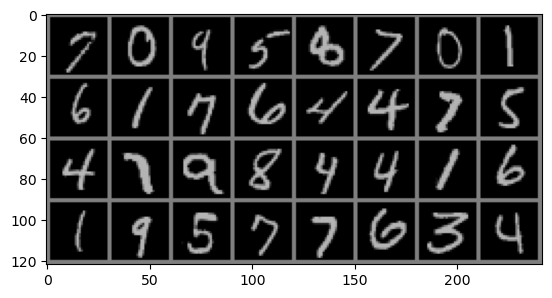

seven zero  nine  five  eight seven zero  one   six   one   seven six   four  four  seven five  four  seven nine  eight four  four  one   six   one   nine  five  seven seven six   three four 


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Functions to show an image

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    print("img shape: ", npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random images
detaiter = iter(trainloader)
images, labels = next(detaiter)

# Show images 
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Convolutional Network Classes

In [9]:
import torch.nn as nn
# 4 layer CNN model
class CNN1(torch.nn.Module):
    def __init__(self, input_size):
        # 1 input image channel, 10 output channels, 5x5 convolutional filters
        super(CNN1,self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, padding='same')
        self.relu1 = nn.ReLU()
        self.flatten1 = nn.Flatten()
        self.fc1 = nn.Linear(12544, 10)

    def forward(self,x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.flatten1(x)
        x = self.fc1(x)
        return x
    

cmodel = CNN1(28*28)
print(cmodel)

CNN1(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (relu1): ReLU()
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=12544, out_features=10, bias=True)
)


In [5]:
from torchinfo import summary

batch_size = 32 #for illustration

summary(cmodel, input_size=(batch_size, 1, 28, 28), device='cpu', col_names=['input_size', 'output_size',
                                                                        'num_params'])

c:\Users\aj824\anaconda3\envs\pt2\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\aj824\anaconda3\envs\pt2\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CNN1                                     [32, 1, 28, 28]           [32, 10]                  --
├─Conv2d: 1-1                            [32, 1, 28, 28]           [32, 16, 28, 28]          416
├─ReLU: 1-2                              [32, 16, 28, 28]          [32, 16, 28, 28]          --
├─Flatten: 1-3                           [32, 16, 28, 28]          [32, 12544]               --
├─Linear: 1-4                            [32, 12544]               [32, 10]                  125,450
Total params: 125,866
Trainable params: 125,866
Non-trainable params: 0
Total mult-adds (M): 14.45
Input size (MB): 0.10
Forward/backward pass size (MB): 3.21
Params size (MB): 0.50
Estimated Total Size (MB): 3.82

Setup the optimizer 

In [10]:
import torch.optim as optim 

# Criterion
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cmodel.parameters(), lr = lr)

In [7]:
for epoch in range(epochs):  # loop over the dataset multiple times
    print("Epoch: ", epoch)
    print("--------------") 

    running_loss = 0.0
    size = len(trainloader.dataset)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward + backward + optimize
        outputs = cmodel(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        if i % 100 == 0:
            loss, current = loss.item(), i * len(inputs)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
    size = len(testloader.dataset)
    num_batches = len(testloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in testloader:
            #X = X.to(device)
            #y = y.to(device)
            pred = cmodel(X)
            test_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


print('Finished Training')
        



Epoch:  0
--------------
loss: 2.365680  [    0/60000]
loss: 0.844029  [ 3200/60000]
loss: 0.488173  [ 6400/60000]
loss: 0.300481  [ 9600/60000]
loss: 0.861630  [12800/60000]
loss: 0.442720  [16000/60000]
loss: 0.417923  [19200/60000]
loss: 0.348485  [22400/60000]
loss: 0.325033  [25600/60000]
loss: 0.105820  [28800/60000]
loss: 0.168044  [32000/60000]
loss: 0.173273  [35200/60000]
loss: 0.280705  [38400/60000]
loss: 0.374290  [41600/60000]
loss: 0.293421  [44800/60000]
loss: 0.285845  [48000/60000]
loss: 0.179378  [51200/60000]
loss: 0.160264  [54400/60000]
loss: 0.059884  [57600/60000]
Test Error: 
 Accuracy: 95.8%, Avg loss: 0.165102 

Epoch:  1
--------------
loss: 0.179960  [    0/60000]
loss: 0.196189  [ 3200/60000]
loss: 0.085982  [ 6400/60000]
loss: 0.711039  [ 9600/60000]
loss: 0.056294  [12800/60000]
loss: 0.047444  [16000/60000]
loss: 0.149061  [19200/60000]
loss: 0.182653  [22400/60000]
loss: 0.209194  [25600/60000]
loss: 0.177781  [28800/60000]
loss: 0.065535  [32000/60000

In [8]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = cmodel(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %


In [45]:
import torch.nn as nn
# 8 layer CNN model
class CNN2(torch.nn.Module):
    def __init__(self, input_size):
        super(CNN2,self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding='same')
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(6, 16, 5, padding='same')
        self.relu2 = nn.ReLU()
        self.flatten1 = nn.Flatten()
        self.fc1 = nn.Linear(12544, 84)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(84, 10)
        

    def forward(self,x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.flatten1(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x
    

cmodel2 = CNN2(28*28)
optimizer = torch.optim.SGD(cmodel2.parameters(), lr = lr)
print(cmodel2)

CNN2(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (relu1): ReLU()
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (relu2): ReLU()
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=12544, out_features=84, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


In [46]:
from torchinfo import summary

batch_size = 32 #for illustration

summary(cmodel2, input_size=(batch_size, 1, 28, 28), device='cpu', col_names=['input_size', 'output_size',
                                                                        'num_params'])

c:\Users\aj824\anaconda3\envs\pt2\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\aj824\anaconda3\envs\pt2\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CNN2                                     [32, 1, 28, 28]           [32, 10]                  --
├─Conv2d: 1-1                            [32, 1, 28, 28]           [32, 6, 28, 28]           156
├─ReLU: 1-2                              [32, 6, 28, 28]           [32, 6, 28, 28]           --
├─Conv2d: 1-3                            [32, 6, 28, 28]           [32, 16, 28, 28]          2,416
├─ReLU: 1-4                              [32, 16, 28, 28]          [32, 16, 28, 28]          --
├─Flatten: 1-5                           [32, 16, 28, 28]          [32, 12544]               --
├─Linear: 1-6                            [32, 12544]               [32, 84]                  1,053,780
├─ReLU: 1-7                              [32, 84]                  [32, 84]                  --
├─Linear: 1-8                            [32, 84]                  [32, 10]                  850
Total params: 1,057,202

In [47]:
for epoch in range(epochs):  # loop over the dataset multiple times
    print("Epoch: ", epoch)
    print("--------------") 

    running_loss = 0.0
    size = len(trainloader.dataset)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward + backward + optimize
        outputs = cmodel2(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        if i % 100 == 0:
            loss, current = loss.item(), i * len(inputs)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
    size = len(testloader.dataset)
    num_batches = len(testloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in testloader:
            #X = X.to(device)
            #y = y.to(device)
            pred = cmodel2(X)
            test_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


print('Finished Training')

Epoch:  0
--------------
loss: 2.305481  [    0/60000]
loss: 1.531955  [ 3200/60000]
loss: 0.687858  [ 6400/60000]
loss: 0.753323  [ 9600/60000]
loss: 0.546061  [12800/60000]
loss: 0.264103  [16000/60000]
loss: 0.263197  [19200/60000]
loss: 0.201854  [22400/60000]
loss: 0.374222  [25600/60000]
loss: 0.372647  [28800/60000]
loss: 0.083319  [32000/60000]
loss: 0.116209  [35200/60000]
loss: 0.491240  [38400/60000]
loss: 0.278258  [41600/60000]
loss: 0.109787  [44800/60000]
loss: 0.183402  [48000/60000]
loss: 0.083432  [51200/60000]
loss: 0.060411  [54400/60000]
loss: 0.196644  [57600/60000]
Test Error: 
 Accuracy: 96.2%, Avg loss: 0.128169 

Epoch:  1
--------------
loss: 0.238189  [    0/60000]
loss: 0.200970  [ 3200/60000]
loss: 0.052697  [ 6400/60000]
loss: 0.191619  [ 9600/60000]
loss: 0.138887  [12800/60000]
loss: 0.350413  [16000/60000]
loss: 0.157491  [19200/60000]
loss: 0.080814  [22400/60000]
loss: 0.099795  [25600/60000]
loss: 0.061887  [28800/60000]
loss: 0.188573  [32000/60000

In [49]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = cmodel2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %


In [61]:
import torch.nn as nn
# 14 layer CNN model
class CNN3(torch.nn.Module):
    def __init__(self, input_size):
        super(CNN3,self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding='same')
        self.bn1 = nn.BatchNorm2d(6)
        self.relu1 = nn.ReLU()
        self.mp1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding='same')
        self.bn2 = nn.BatchNorm2d(16)
        self.relu2 = nn.ReLU()
        self.mp2 = nn.MaxPool2d(2)
        self.flatten1 = nn.Flatten()
        self.fc1 = nn.Linear(784, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        

    def forward(self,x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.mp1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.mp2(x)
        x = self.flatten1(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        x = self.relu4(x)
        x = self.fc3(x)
        return x
    

cmodel3 = CNN3(28*28)
optimizer = torch.optim.SGD(cmodel3.parameters(), lr = lr)
print(cmodel3)

CNN3(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [62]:
from torchinfo import summary

batch_size = 32 #for illustration

summary(cmodel3, input_size=(batch_size, 1, 28, 28), device='cpu', col_names=['input_size', 'output_size',
                                                                        'num_params'])

c:\Users\aj824\anaconda3\envs\pt2\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\aj824\anaconda3\envs\pt2\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CNN3                                     [32, 1, 28, 28]           [32, 10]                  --
├─Conv2d: 1-1                            [32, 1, 28, 28]           [32, 6, 28, 28]           156
├─BatchNorm2d: 1-2                       [32, 6, 28, 28]           [32, 6, 28, 28]           12
├─ReLU: 1-3                              [32, 6, 28, 28]           [32, 6, 28, 28]           --
├─MaxPool2d: 1-4                         [32, 6, 28, 28]           [32, 6, 14, 14]           --
├─Conv2d: 1-5                            [32, 6, 14, 14]           [32, 16, 14, 14]          2,416
├─BatchNorm2d: 1-6                       [32, 16, 14, 14]          [32, 16, 14, 14]          32
├─ReLU: 1-7                              [32, 16, 14, 14]          [32, 16, 14, 14]          --
├─MaxPool2d: 1-8                         [32, 16, 14, 14]          [32, 16, 7, 7]            --
├─Flatten: 1-9                 

In [66]:
for epoch in range(epochs):  # loop over the dataset multiple times
    print("Epoch: ", epoch)
    print("--------------") 

    running_loss = 0.0
    size = len(trainloader.dataset)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward + backward + optimize
        outputs = cmodel3(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        if i % 100 == 0:
            loss, current = loss.item(), i * len(inputs)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
    size = len(testloader.dataset)
    num_batches = len(testloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in testloader:
            #X = X.to(device)
            #y = y.to(device)
            pred = cmodel3(X)
            test_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


print('Finished Training')

Epoch:  0
--------------
loss: 2.368721  [    0/60000]
loss: 1.870274  [ 3200/60000]
loss: 0.649747  [ 6400/60000]
loss: 0.484343  [ 9600/60000]
loss: 0.316339  [12800/60000]
loss: 0.271136  [16000/60000]
loss: 0.148764  [19200/60000]
loss: 0.073224  [22400/60000]
loss: 0.318970  [25600/60000]
loss: 0.274843  [28800/60000]
loss: 0.093480  [32000/60000]
loss: 0.146383  [35200/60000]
loss: 0.132766  [38400/60000]
loss: 0.157624  [41600/60000]
loss: 0.119542  [44800/60000]
loss: 0.084574  [48000/60000]
loss: 0.080631  [51200/60000]
loss: 0.301349  [54400/60000]
loss: 0.048410  [57600/60000]
Test Error: 
 Accuracy: 97.2%, Avg loss: 0.086805 

Epoch:  1
--------------
loss: 0.097615  [    0/60000]
loss: 0.038653  [ 3200/60000]
loss: 0.071032  [ 6400/60000]
loss: 0.151115  [ 9600/60000]
loss: 0.066190  [12800/60000]
loss: 0.087166  [16000/60000]
loss: 0.151678  [19200/60000]
loss: 0.026919  [22400/60000]
loss: 0.201039  [25600/60000]
loss: 0.011729  [28800/60000]
loss: 0.032659  [32000/60000

In [67]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = cmodel3(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %


Which of the three models had the least amount of error for validation? 
The 4 layer, the 8 layer, and 14 layer model had an outstanding accuracy of 98% after testing them against the test dataset.

How long it took to train each model?
    a. The 4 layer model took around 8 minutes 31.2 seconds to train. 
    b. The 8 layer model took 15 minutes 32.5 seconds to train
    c. The 14 layer model took around 10 minutes 38 seconds to train

Bonus Custom CNN Model

In [11]:
import torch.nn as nn
# Bonus CNN model
class CNN4(torch.nn.Module):
    def __init__(self, input_size):
        super(CNN4,self).__init__()
        self.conv1 = nn.Conv2d(1, 128, 3, padding='same')
        self.bn1 = nn.BatchNorm2d(128)
        self.mp1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(128, 64, 3, padding='same')
        self.bn2 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(12544, 84)
        self.fc2 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(0.001567)
        

    def forward(self,x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.mp1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return x
    

cmodel4 = CNN4(28*28)
optimizer = torch.optim.SGD(cmodel4.parameters(), lr = lr)
print(cmodel4)

CNN4(
  (conv1): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=12544, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.001567, inplace=False)
)


In [6]:
from torchinfo import summary

batch_size = 32 #for illustration

summary(cmodel4, input_size=(batch_size, 1, 28, 28), device='cpu', col_names=['input_size', 'output_size',
                                                                        'num_params'])

c:\Users\aj824\anaconda3\envs\pt2\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\aj824\anaconda3\envs\pt2\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CNN4                                     [32, 1, 28, 28]           [32, 10]                  --
├─Conv2d: 1-1                            [32, 1, 28, 28]           [32, 128, 28, 28]         1,280
├─BatchNorm2d: 1-2                       [32, 128, 28, 28]         [32, 128, 28, 28]         256
├─MaxPool2d: 1-3                         [32, 128, 28, 28]         [32, 128, 14, 14]         --
├─Conv2d: 1-4                            [32, 128, 14, 14]         [32, 64, 14, 14]          73,792
├─BatchNorm2d: 1-5                       [32, 64, 14, 14]          [32, 64, 14, 14]          128
├─ReLU: 1-6                              [32, 64, 14, 14]          [32, 64, 14, 14]          --
├─Flatten: 1-7                           [32, 64, 14, 14]          [32, 12544]               --
├─Linear: 1-8                            [32, 12544]               [32, 84]                  1,053,780
├─Linear: 1-9      

In [12]:
for epoch in range(epochs):  # loop over the dataset multiple times
    print("Epoch: ", epoch)
    print("--------------") 

    running_loss = 0.0
    size = len(trainloader.dataset)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward + backward + optimize
        outputs = cmodel4(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        if i % 100 == 0:
            loss, current = loss.item(), i * len(inputs)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
    size = len(testloader.dataset)
    num_batches = len(testloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in testloader:
            #X = X.to(device)
            #y = y.to(device)
            pred = cmodel4(X)
            test_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


print('Finished Training')

Epoch:  0
--------------
loss: 2.317155  [    0/60000]
loss: 0.482956  [ 3200/60000]
loss: 0.186918  [ 6400/60000]
loss: 0.472008  [ 9600/60000]
loss: 0.061528  [12800/60000]
loss: 0.029174  [16000/60000]
loss: 0.182370  [19200/60000]
loss: 0.259084  [22400/60000]
loss: 0.236645  [25600/60000]
loss: 0.049582  [28800/60000]
loss: 0.063481  [32000/60000]
loss: 0.082781  [35200/60000]
loss: 0.052535  [38400/60000]
loss: 0.036721  [41600/60000]
loss: 0.069316  [44800/60000]
loss: 0.030191  [48000/60000]
loss: 0.067719  [51200/60000]
loss: 0.031561  [54400/60000]
loss: 0.068664  [57600/60000]
Test Error: 
 Accuracy: 98.2%, Avg loss: 0.062026 

Epoch:  1
--------------
loss: 0.026473  [    0/60000]
loss: 0.034438  [ 3200/60000]
loss: 0.045464  [ 6400/60000]
loss: 0.080597  [ 9600/60000]
loss: 0.060768  [12800/60000]
loss: 0.007286  [16000/60000]
loss: 0.027299  [19200/60000]
loss: 0.006267  [22400/60000]
loss: 0.014494  [25600/60000]
loss: 0.022376  [28800/60000]
loss: 0.004967  [32000/60000

In [13]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = cmodel4(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %
